In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Human 

In [2]:
coh_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/'
pli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/'
wpli_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/'
plv_folder = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/'

delta_coh = pd.read_csv(coh_folder + 'delta_graph_theory.csv')
theta_coh = pd.read_csv(coh_folder + 'theta_graph_theory.csv')
sigma_coh = pd.read_csv(coh_folder + 'sigma_graph_theory.csv')
beta_coh = pd.read_csv(coh_folder + 'beta_graph_theory.csv')


delta_pli = pd.read_csv(pli_folder + 'delta_graph_theory.csv')
theta_pli = pd.read_csv(pli_folder + 'theta_graph_theory.csv')
sigma_pli = pd.read_csv(pli_folder + 'sigma_graph_theory.csv')
beta_pli = pd.read_csv(pli_folder + 'beta_graph_theory.csv')

delta_wpli = pd.read_csv(wpli_folder + 'delta_graph_theory.csv')
theta_wpli = pd.read_csv(wpli_folder + 'theta_graph_theory.csv')
sigma_wpli = pd.read_csv(wpli_folder + 'sigma_graph_theory.csv')
beta_wpli = pd.read_csv(wpli_folder + 'beta_graph_theory.csv')

delta_plv = pd.read_csv(plv_folder + 'delta_graph_theory.csv')
theta_plv = pd.read_csv(plv_folder + 'theta_graph_theory.csv')
sigma_plv = pd.read_csv(plv_folder + 'sigma_graph_theory.csv')
beta_plv = pd.read_csv(plv_folder + 'beta_graph_theory.csv')

In [18]:
all_columns = delta_coh.iloc[:, 4:].columns.tolist()
all_columns 

['Frequency',
 'Transitivity_delta_coh',
 'glob_eff_delta_coh',
 'avg_clust_coeff_delta_coh',
 'modularity_delta_coh',
 'ocular_wf_close_delta_coh',
 'central_wf_close_delta_coh',
 'occip_wf_close_delta_coh']

In [23]:
def separate_columns(df, frequency = "_delta_coh"):
    # List of columns to keep as identifier variables
    
    id_vars = ["Idx", "Patient_ID", "Genotype", "Frequency"]

    # List of columns to melt into 'frequency' values
    value_vars = df.columns.difference(id_vars)

    # Perform the melt operation to reshape the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name="regions_frequency")
    
    # Split the 'regions_frequency' column into 'regions' and 'frequency' columns
    melted_df[["regions", "frequency"]] = melted_df["regions_frequency"].str.split((str(frequency)), expand=True)

    #Drop the original 'regions_frequency' column
    melted_df.drop(columns=["regions_frequency"], inplace=True)
    melted_df.drop(columns=["frequency"], inplace=True)
    
    # Group the DataFrame by 'Animal_ID' and 'frequency', and calculate the mean value within each group
    averaged_df = melted_df.groupby(['Patient_ID', 'Frequency', 'Genotype', 'regions'], as_index=False)['value'].mean()
    
    return melted_df, averaged_df

In [47]:
delta_melted_df, delta_averaged_df = separate_columns(delta_plv, frequency = "_delta_plv")
theta_melted_df, theta_averaged_df = separate_columns(theta_plv, frequency = "_theta_plv")
sigma_melted_df, sigma_averaged_df = separate_columns(sigma_plv, frequency = "_sigma_plv")
beta_melted_df, beta_averaged_df = separate_columns(beta_plv, frequency = "_beta_plv")

In [48]:
theta_melted_df

,Idx,Patient_ID,Genotype,Frequency,value,regions
0,95,P15 N1,GAP,theta,0.750000,Transitivity
1,96,P15 N1,GAP,theta,0.882353,Transitivity
2,138,P15 N1,GAP,theta,1.000000,Transitivity
3,193,P15 N1,GAP,theta,1.000000,Transitivity
4,200,P15 N1,GAP,theta,0.882353,Transitivity
...,...,...,...,...,...,...
52795,1610,P11 N1,WT,theta,0.916667,ocular_wf_close
52796,1665,P11 N1,WT,theta,0.916667,ocular_wf_close
52797,1672,P11 N1,WT,theta,0.812500,ocular_wf_close
52798,1674,P11 N1,WT,theta,0.857143,ocular_wf_close


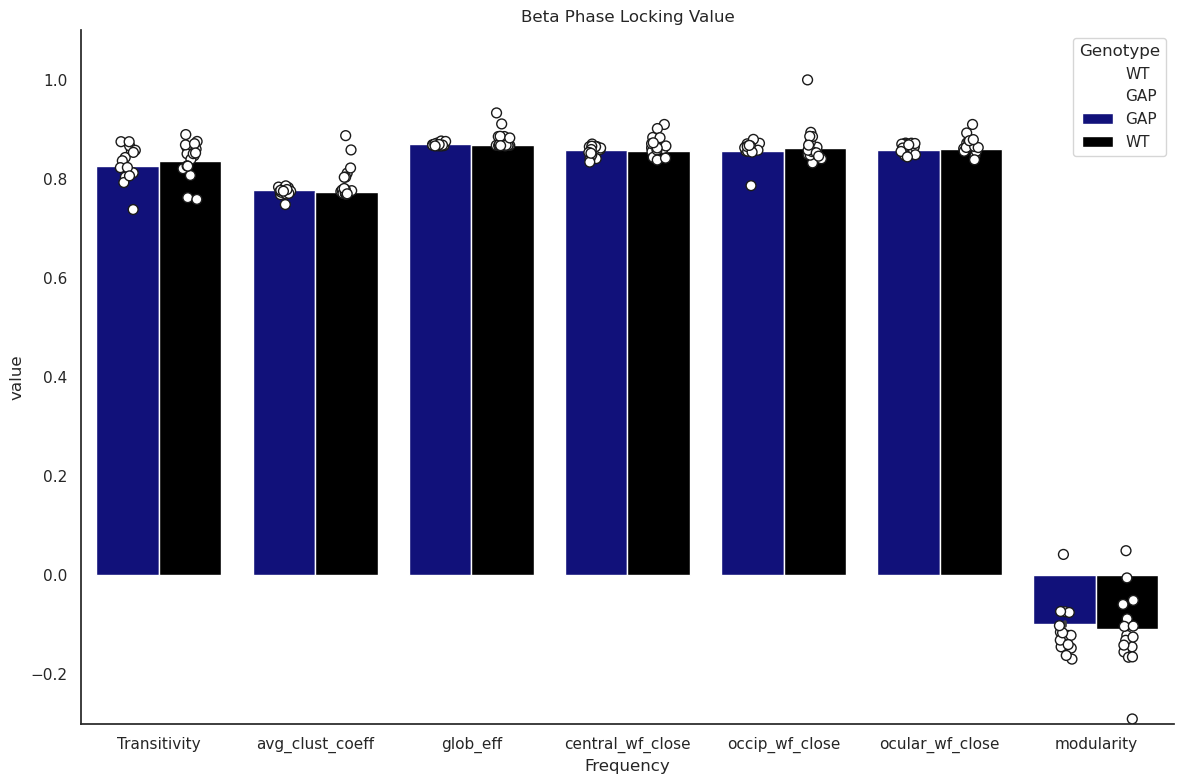

In [60]:
# Set the style
sns.set(style="white")
custom_palette = {"GAP": "darkblue", "WT": "black"}
custom_palette_strip = {"GAP": 'white', "WT": "white"}  # Tuple (fill color, outline color)

desired_order = ['Transitivity', 'avg_clust_coeff', 'glob_eff', 'central_wf_close', 'occip_wf_close',
                'ocular_wf_close', 'modularity']

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="regions", y="value", hue="Genotype", data= beta_melted_df, 
                      order = desired_order, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("value")
plt.title("Beta Phase Locking Value")
plt.ylim(-0.3, 1.1)

stripplot = sns.stripplot(x="regions",y="value",hue="Genotype",data=beta_averaged_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip, order = desired_order,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
#stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plots/')
plt.savefig("beta_plv_graph.png", dpi=300, bbox_inches="tight")
plt.savefig("beta_plv_graph.svg", dpi=300, bbox_inches="tight")
plt.show()